In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import (classification_report, confusion_matrix, f1_score,
                             precision_score, recall_score)

In [27]:
df = pd.read_csv('..\datasets\dataset-4000sentencas-multilabel.csv')
df_maritaca_zeroshot = pd.read_csv('..\datasets\dataset-maritaca-zeroshot-multilabel.csv')
df_maritaca_oneshot = pd.read_csv('..\datasets\dataset-maritaca-oneshot-multilabel.csv')

In [28]:
labels = ['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']

# Encontrar as linhas que não foram classificadas
zero_rows_zeroshot = df_maritaca_zeroshot[(df_maritaca_zeroshot[labels] == 0).all(axis=1)]
zero_rows_oneshot = df_maritaca_oneshot[(df_maritaca_oneshot[labels] == 0).all(axis=1)]

print("Linhas não classificadas (zero shot)",len(zero_rows_zeroshot))
print("Linhas não classificadas (one shot)",len(zero_rows_oneshot))

Linhas não classificadas (zero shot) 70
Linhas não classificadas (one shot) 157


In [29]:
# Função para calcular e exibir métricas
def calcular_metricas(y_true, y_pred, nome_modelo):
    f1_macro = f1_score(y_true, y_pred, average='macro')
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    precision_micro = precision_score(y_true, y_pred, average='micro')
    recall_micro = recall_score(y_true, y_pred, average='micro')
    
    print(f"\n{nome_modelo}")
    print(f"F1-Score Macro: {f1_macro:.4f}")
    print(f"Precision Macro: {precision_macro:.4f}")
    print(f"Recall Macro: {recall_macro:.4f}")
    print(f"F1-Score Micro: {f1_micro:.4f}")
    print(f"Precision Micro: {precision_micro:.4f}")
    print(f"Recall Micro: {recall_micro:.4f}")

# Valores reais
y_true = df[labels]

# Predições
y_pred_zeroshot = df_maritaca_zeroshot[labels]
y_pred_oneshot = df_maritaca_oneshot[labels]

# Calcular e exibir métricas para ambos os modelos
calcular_metricas(y_true, y_pred_zeroshot, "Zero-Shot")
calcular_metricas(y_true, y_pred_oneshot, "One-Shot")


Zero-Shot
F1-Score Macro: 0.6728
Precision Macro: 0.6192
Recall Macro: 0.7660
F1-Score Micro: 0.7950
Precision Micro: 0.7411
Recall Micro: 0.8574

One-Shot
F1-Score Macro: 0.6156
Precision Macro: 0.5958
Recall Macro: 0.7113
F1-Score Micro: 0.7447
Precision Micro: 0.6961
Recall Micro: 0.8007


Zero-Shot
              precision    recall  f1-score   support

    ambiente       0.72      0.93      0.81      1257
      bebida       0.55      0.88      0.68       404
      comida       0.87      0.96      0.91      2091
       geral       0.62      0.52      0.57      1193
 localização       0.43      0.91      0.58       201
      outros       0.06      0.08      0.07       106
       preço       0.91      0.88      0.90       784
     serviço       0.80      0.97      0.88      1406

   micro avg       0.74      0.86      0.80      7442
   macro avg       0.62      0.77      0.67      7442
weighted avg       0.76      0.86      0.80      7442
 samples avg       0.76      0.85      0.79      7442



c:\VSCODEProjects\artigo2024\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


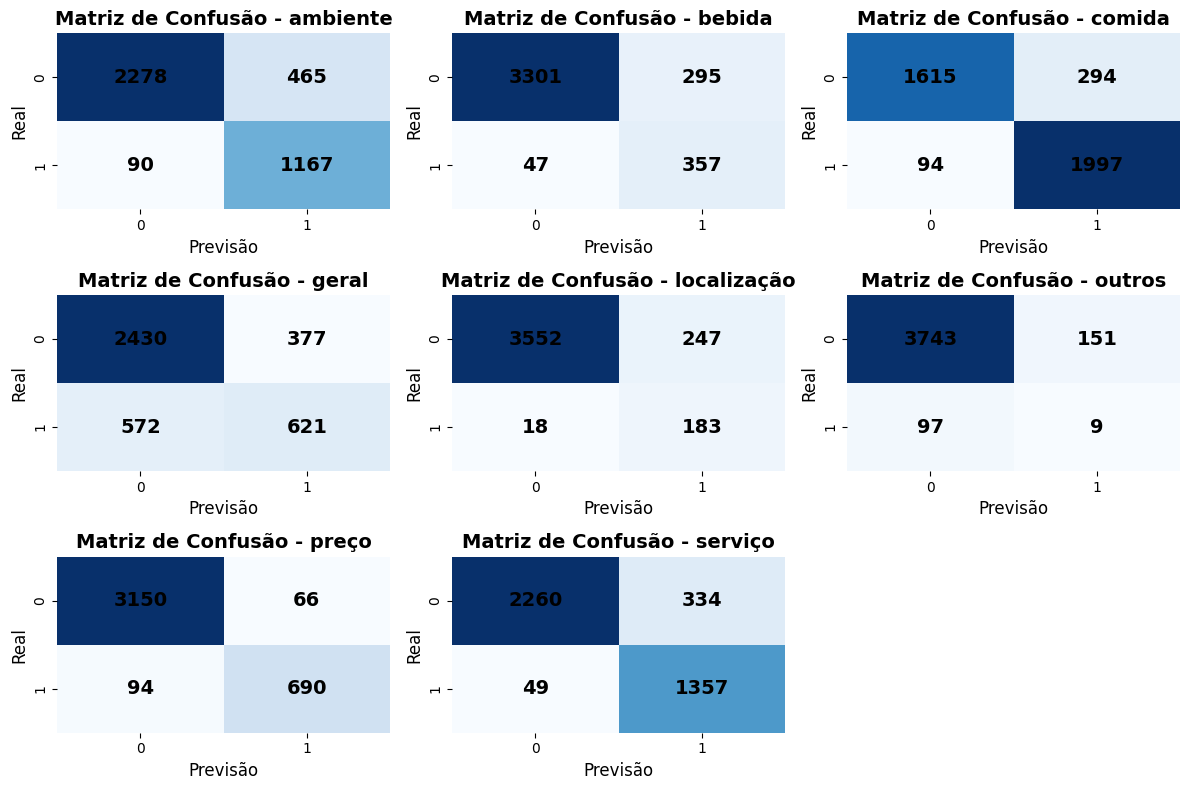

In [30]:
# Classification report e Matriz de Confusão - Zero Shot
print("Zero-Shot")
report = classification_report(y_true, y_pred_zeroshot, target_names=labels)
print(report)

plt.figure(figsize=(12, 8))

# Iterar sobre cada coluna para calcular a matriz de confusão e plotar usando Seaborn
for i, coluna in enumerate(labels, 1):
    plt.subplot(3, 3, i)
    
    y_true_cm = df[coluna]  # Valores reais para a coluna atual
    y_pred_cm = df_maritaca_zeroshot[coluna]  # Previsões para a coluna atual
    
    # Calcular a matriz de confusão
    cm = confusion_matrix(y_true_cm, y_pred_cm)
    
    # Gerar a matriz de confusão usando Seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                annot_kws={'size': 14, 'color': 'black', 'weight': 'bold'})
    
    plt.title(f'Matriz de Confusão - {coluna}', size=14, weight='bold')
    plt.xlabel('Previsão', size=12)
    plt.ylabel('Real', size=12)

plt.tight_layout()
plt.show()

One-Shot
              precision    recall  f1-score   support

    ambiente       0.73      0.86      0.79      1257
      bebida       0.41      0.78      0.54       404
      comida       0.81      0.95      0.88      2091
       geral       0.76      0.28      0.41      1193
 localização       0.37      0.82      0.51       201
      outros       0.04      0.13      0.06       106
       preço       0.90      0.91      0.91       784
     serviço       0.75      0.95      0.84      1406

   micro avg       0.70      0.80      0.74      7442
   macro avg       0.60      0.71      0.62      7442
weighted avg       0.74      0.80      0.74      7442
 samples avg       0.72      0.79      0.73      7442



c:\VSCODEProjects\artigo2024\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


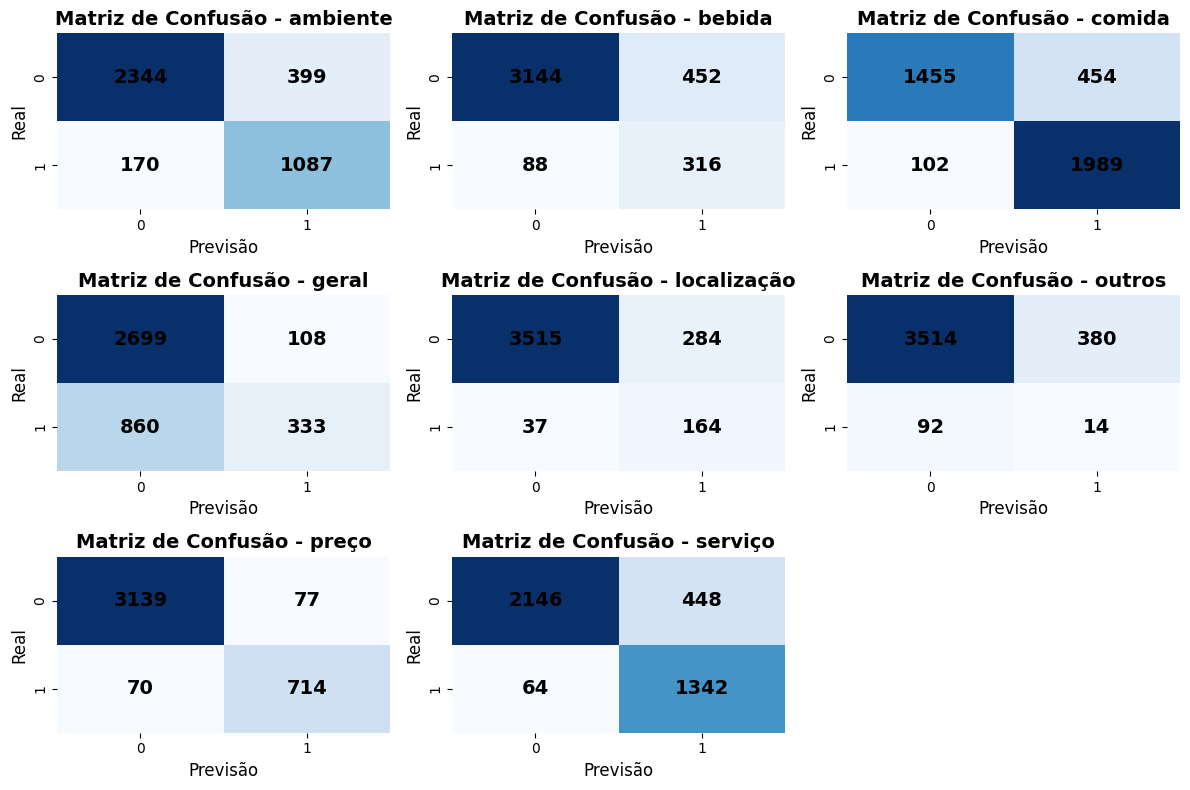

In [31]:
# Classification report e Matriz de Confusão - One Shot
print("One-Shot")
report = classification_report(y_true, y_pred_oneshot, target_names=labels)
print(report)

plt.figure(figsize=(12, 8))

# Iterar sobre cada coluna para calcular a matriz de confusão e plotar usando Seaborn
for i, coluna in enumerate(labels, 1):
    plt.subplot(3, 3, i)
    
    y_true_cm = df[coluna]  # Valores reais para a coluna atual
    y_pred_cm = df_maritaca_oneshot[coluna]  # Previsões para a coluna atual
    
    # Calcular a matriz de confusão
    cm = confusion_matrix(y_true_cm, y_pred_cm)
    
    # Gerar a matriz de confusão usando Seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                annot_kws={'size': 14, 'color': 'black', 'weight': 'bold'})
    
    plt.title(f'Matriz de Confusão - {coluna}', size=14, weight='bold')
    plt.xlabel('Previsão', size=12)
    plt.ylabel('Real', size=12)

plt.tight_layout()
plt.show()